In [1]:
#import

import pandas as pd
from pandas import DataFrame,Series
import numpy as np
from sklearn.preprocessing import StandardScaler

#特征选择
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel

In [2]:
#导入训练特征

all_feature_train=pd.read_csv('all_feature_input/all_features_train.csv',encoding='gb18030')

#导入测试集特征

all_feature_test=pd.read_csv('all_feature_input/all_features_test.csv',encoding='gb18030')

In [4]:
all_feature_train.head()

,id,money,POS_recharge_mean,amount_mean,bus_mean,canteen_mean,card_recharge_mean,f_ten_canteen_mean,f_ten_place_mean,hospital_mean,...,borrow_resting_day_rate,borrow_working_day_rate,borrow_day_sum,borrow_day_per,0_percent,1000_percent,1500_percent,2000_percent,amount_college_rank,amount_score_rank
0,19,0,0.946161,8.194343,0.110413,0.411749,0.016769,0.094254,0.144379,0.000407,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,108.0,756.0
1,9401,0,0.953393,6.257133,0.087029,0.343523,0.014170,0.119027,0.151388,0.000328,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,100.0,76700.0
2,22071,0,0.953000,6.780568,0.117958,0.350116,0.013756,0.080419,0.328425,0.000322,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,81.0,31185.0
3,29603,0,0.963326,8.150449,0.053137,0.330473,0.010171,0.082275,0.219569,-0.000250,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,277.0,114124.0
4,21,0,0.968227,5.465932,0.058210,0.323161,0.026632,0.111922,0.313870,0.000475,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,113.0,43053.0


In [4]:
len(all_feature_train)

10885

In [3]:
#去除从训练集中去除id、money

X_train=all_feature_train.drop(['id','money'],axis=1)
X_test=all_feature_train.drop(['id','money'],axis=1)

In [6]:
c=np.array([[1,2,3,4],[5,6,7,8]])
d=np.array([[2,4],[6,8]])
e=[]
for i in range(4):
    if c[:,i:i+1] in d:
        e.append(i)
e

[1, 3]

In [4]:
#特征选择(train)

#去除低方差的特称
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel = VarianceThreshold()
X_new_train=sel.fit_transform(X_train)
#m运用卡方验证获得最好的前450个特征
Slk=SelectKBest(chi2, k=450)
X_new_train = Slk.fit_transform(np.abs(X_new_train), all_feature_train['money'])

In [5]:
#特征选择(test)

#去除低方差的特称
X_test=all_feature_train.drop(['id','money'],axis=1)
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel = VarianceThreshold()
X_new_test=sel.fit_transform(X_test)
#m运用卡方验证获得最好的前450个特征
X_new_test = SelectKBest(chi2, k=450).fit_transform(np.abs(X_new_test), all_feature_train['money'])

In [6]:
#数据标准分
X_new_train=StandardScaler().fit_transform(X_new_train)
X_new_test=StandardScaler().fit_transform(X_new_test)

In [9]:
index=np.argsort(X_new_train)
index.max()

449

In [7]:
all_feature_test.head()

,id,money,POS_recharge_mean,amount_mean,bus_mean,canteen_mean,card_recharge_mean,f_ten_canteen_mean,f_ten_place_mean,hospital_mean,...,borrow_resting_day_rate,borrow_working_day_rate,borrow_day_sum,borrow_day_per,0_percent,1000_percent,1500_percent,2000_percent,amount_college_rank,amount_score_rank
0,316,0.0,0.970361,6.086440,0.046161,0.291770,0.022220,0.174279,0.328624,-0.000149,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,213.0,160176.0
1,7399,0.0,0.970488,8.164384,0.063330,0.353499,0.031007,0.151998,0.310721,0.000158,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,170.0,70720.0
2,12370,0.0,0.944889,8.451108,0.110569,0.357973,0.023152,0.120780,0.277767,-0.000161,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,58.0,37584.0
3,21479,0.0,0.947016,8.281770,0.082200,0.276062,0.009322,0.170226,0.321603,0.000231,...,0.0,1.0,1.0,1.0,0.353063,0.021807,0.020768,0.010384,128.0,88320.0
4,29078,0.0,0.945593,7.880259,0.067525,0.282774,0.025579,0.108638,0.167391,0.000134,...,0.0,0.0,0.0,0.0,0.353063,0.021807,0.020768,0.010384,78.0,50622.0


In [8]:
label='money'
IDcol='id'
ids=all_feature_test['id'].values
predictors=[x for x in all_feature_train.columns if x not in ['money','id']]

In [9]:
#GBDT
from sklearn.ensemble import GradientBoostingClassifier

#交叉验证测评
from sklearn import metrics
from sklearn.model_selection import cross_val_score

#数据二值化
#from sklearn.preprocessing import Binarizer

#k折分层
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold


#网格调参
from sklearn.model_selection import GridSearchCV

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4

In [10]:
#分层划分训练测试集（根据原样本获奖人数分布划分，划分后子样本获奖人数比例与样本一致）

#X=all_feature_train.drop(['id','money'],axis=1)
money=[1000,1500,2000]
skf = StratifiedKFold(n_splits=5,random_state=1359,shuffle=True)
for train, test in skf.split(X_new_train,all_feature_train['money']):
    #原样本与分层划分样本获奖人数比例比较
    train1=all_feature_train.ix[test]
    for i in range(len(money)):
        train_i=all_feature_train[all_feature_train['money']==money[i]]
        test_i=train1[train1['money']==money[i]]
        print len(train_i), len(test_i)

741 149
465 93
354 71
741 148
465 93
354 71
741 148
465 93
354 71
741 148
465 93
354 71
741 148
465 93
354 70


In [11]:
#不分层划分

#X=all_feature_train.drop(['id','money'],axis=1)
money=[1000,1500,2000]
kf=KFold(n_splits=5,random_state=2017,shuffle=True)
for train, test in kf.split(X_new_train):
    #原样本与未分层划分样本获奖人数比例比较
    train2=all_feature_train.ix[test]
    for i in range(len(money)):
        train_i=all_feature_train[all_feature_train['money']==money[i]]
        test_i=train2[train2['money']==money[i]]
        print len(train_i), len(test_i)

741 149
465 98
354 87
741 172
465 90
354 69
741 147
465 97
354 71
741 134
465 86
354 69
741 139
465 94
354 58


In [14]:
#分层交叉验证的准确率（结果很稳定）
clf=GradientBoostingClassifier(random_state=2017)
%time cv_skf=cross_val_score(clf,X_new_train,all_feature_train['money'],cv=skf)
cv_skf

Wall time: 11min 25s


array([ 0.84986226,  0.85668351,  0.85071199,  0.85392742,  0.85477941])

In [ ]:
#未分层交叉验证的准确率（结果不稳定）
%time cv_kf=cross_val_score(clf,X_new_train,all_feature_train['money'],cv=kf)
cv_kf

In [11]:
def modelfit(alg, dtrain, predictor, cv_folds, performCV=True, printFeatureImportance=True):
    #算法拟合数据
    alg.fit(dtrain[predictor], dtrain['money'])
        
    #用训练出模型预测测试集
    dtrain_predictions = alg.predict(dtrain[predictor])
    dtrain_predprob = alg.predict_proba(dtrain[predictor])[:,1]
    
    #标签二值化
    #dummies=Binarizer.fit_transform(dtrain['money'])
    
    #显示交叉验证的准确率
    if performCV:
        cv_score = cross_val_score(alg, dtrain[predictor], dtrain['money'], cv=cv_folds)
    
    #模型输出报告
    print "\nModel Report"
    #print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['money'], dtrain_predictions)
    #print "f1_Score (micro): %f" % metrics.f1_score(dtrain['money'], dtrain_predictions,average='micro')
    #print "f1_Score (macro): %f" % metrics.f1_score(dtrain['money'], dtrain_predictions,average='macro')
    #print  "roc_auc_score : %f" % metrics.roc_auc_score(dummies.T,dtrain_predprob )
    print metrics.classification_report(dtrain['money'],dtrain_predictions)
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #重要特征显示
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictor).sort_values(ascending=False)[:20]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
             precision    recall  f1-score   support

          0       0.88      1.00      0.94      9325
       1000       0.88      0.19      0.32       741
       1500       0.99      0.20      0.34       465
       2000       1.00      0.22      0.36       354

avg / total       0.89      0.89      0.85     10885

CV Score : Mean - 0.8532845 | Std - 0.002615289 | Min - 0.8493339 | Max - 0.8571429


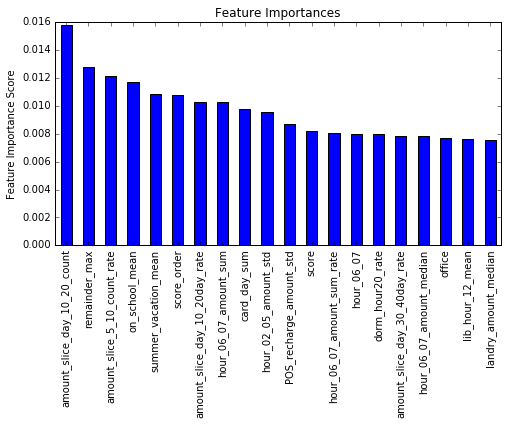

In [12]:
#用默认参数训练出的基线模型(所有特征)
gbm0 = GradientBoostingClassifier(random_state=10)
gbm0.fit(X_train,all_feature_train['money'])
modelfit(gbm0,all_feature_train,predictors,skf)

### GBDT 重要参数：
#### *learning_rate（学习率）
#### * n_estimators（需要使用到的决定树的数量）
#### * min_samples_split （一个节点分裂所需的最少样本数）
#### * min_samples_leaf（成为叶子节点所需要的最少的样本数）
#### * max_depth （树的最大深度）
#### * max_features（节点分裂时参与判断的最大特征数）

In [13]:
def modelfit1(alg, dtrain, x_train,cv_folds, performCV=True, printFeatureImportance=True):
    #算法拟合数据
    alg.fit(x_train, dtrain['money'])
        
    #用训练出模型预测测试集
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
    
    #标签二值化
    #binarizer = Binarizer()
    #dummies=binarizer.fit_transform(dtrain['money'])
    #dummies=dummies.reshape(-1,1)
    
    #显示交叉验证的准确率
    if performCV:
        cv_score = cross_val_score(alg, x_train, dtrain['money'], cv=cv_folds)
    
    #模型输出报告
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['money'], dtrain_predictions)
    #print "f1_Score (micro): %f" % metrics.f1_score(dtrain['money'], dtrain_predictions,average='micro')
    #print "f1_Score (macro): %f" % metrics.f1_score(dtrain['money'], dtrain_predictions,average='macro')
    #print  "roc_auc_score : %f" % metrics.roc_auc_score(dummies,dtrain_predprob )
    print metrics.classification_report(dtrain['money'],dtrain_predictions)
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
    #重要特征显示
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_).sort_values(ascending=False)[:20]
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [18]:
print "Accuracy : %.4g" % metrics.accuracy_score(all_feature_train['money'], predictor1)

Accuracy : 0.8877



Model Report
Accuracy : 0.8877
             precision    recall  f1-score   support

          0       0.89      1.00      0.94      9325
       1000       0.94      0.21      0.35       741
       1500       0.98      0.20      0.33       465
       2000       1.00      0.26      0.41       354

avg / total       0.90      0.89      0.86     10885

CV Score : Mean - 0.8525498 | Std - 0.002279001 | Min - 0.8498623 | Max - 0.8557648


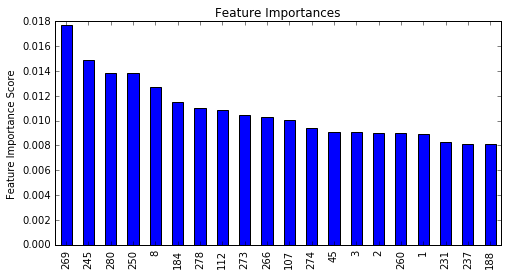

In [16]:
#用默认参数训练出的基线模型(所有特征)
gbm1 = GradientBoostingClassifier(random_state=10)
gbm1.fit(X_new_train,all_feature_train['money'])
modelfit1(gbm1,all_feature_train,X_new_train,skf)

In [85]:
X_new_train

array([[ 0.47331295, -1.20497156,  1.27928914, ..., -1.09457311,
        -1.00139027, -0.87470398],
       [-0.60523387, -1.15857854, -0.74110418, ..., -1.09457311,
        -1.02672117, -0.7525604 ],
       [-0.31380975,  0.01335551,  1.07682827, ..., -1.09457311,
        -1.08688205, -0.82576388],
       ..., 
       [ 0.32928006, -1.33940058,  0.38004419, ...,  0.06246528,
        -0.81140852, -0.75459978],
       [-0.26718153, -1.0478431 ,  0.1340581 , ..., -1.09457311,
        -0.5264359 , -0.67964804],
       [-0.37070506, -0.48604566,  0.20008316, ..., -1.09457311,
        -0.52960226, -0.67999544]])

In [1]:
#调节n_estimators参数
param_test1 = {'n_estimators':range(10,201,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=2,
                                  min_samples_leaf=1,max_depth=6,max_features='sqrt', subsample=0.8,random_state=10), 
                       param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_new_train,all_feature_train['money'])

In [49]:
#查看调参结果
gsearch1.cv_results_,gsearch1.best_params_,gsearch1.best_score_

({'mean_fit_time': array([  3.36540003,   6.3848    ,   9.02879996,  11.65820003,
          14.398     ,  17.14860001,  19.70580001,  22.53620005,
          25.27179999,  28.17680001,  30.71320004,  33.37179999,
          36.12379999,  38.71519995,  41.35179992,  44.04619999,
          46.71399994,  49.51399999,  52.26360002,  50.14879999]),
  'mean_score_time': array([ 0.02259998,  0.03759995,  0.05180001,  0.06779995,  0.09000001,
          0.09579997,  0.1098    ,  0.12819996,  0.14119997,  0.15999999,
          0.17159991,  0.1908    ,  0.20180001,  0.21500001,  0.22980013,
          0.24439998,  0.26700001,  0.28160005,  0.29219995,  0.221     ]),
  'mean_test_score': array([ 0.8530088 ,  0.83867711,  0.82792795,  0.81644324,  0.80468284,
          0.7958621 ,  0.78704064,  0.78235445,  0.78033349,  0.77803612,
          0.77316593,  0.77334988,  0.7705935 ,  0.76765237,  0.76746829,
          0.76618199,  0.76535559,  0.76682562,  0.76480403,  0.76498807]),
  'mean_train_score': 

In [2]:
param_test2 = {'min_samples_split':range(2,11,1),'min_samples_leaf':range(1,11,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=6,
                                                 max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test2,n_jobs=4,iid=False, cv=5)
%time gsearch2.fit(X_new_train,all_feature_train['money'])

In [16]:
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([ 30.44099998,  29.71120005,  29.48419995,  29.09499998,
          28.85220008,  28.66859999,  28.48960004,  28.53659992,  26.03719988]),
  'mean_score_time': array([ 0.15700006,  0.15939994,  0.15680003,  0.15699997,  0.16099997,
          0.15820007,  0.15539994,  0.16560001,  0.13640013]),
  'mean_test_score': array([ 0.78795896,  0.78382453,  0.77886125,  0.78354744,  0.78097518,
          0.77757478,  0.77895468,  0.78161907,  0.77996335]),
  'mean_train_score': array([ 0.9848416 ,  0.9846578 ,  0.98539278,  0.98385402,  0.98311899,
          0.98210838,  0.98171803,  0.98061556,  0.98070742]),
  'param_min_samples_split': masked_array(data = [2 3 4 5 6 7 8 9 10],
               mask = [False False False False False False False False False],
         fill_value = ?),
  'params': ({'min_samples_split': 2},
   {'min_samples_split': 3},
   {'min_samples_split': 4},
   {'min_samples_split': 5},
   {'min_samples_split': 6},
   {'min_samples_split': 7},
   {'min

In [18]:
#调节min_samples_leaf参数

param_test3 = {'min_samples_leaf':range(1,11,1)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,max_depth=6,
                                                   min_samples_split=2,max_features='sqrt', subsample=0.8, random_state=10), 
                       param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_new_train,all_feature_train['money'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=6,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [19]:
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

({'mean_fit_time': array([ 30.07080002,  30.26119995,  29.88919997,  30.08300004,
          29.69519997,  29.8848    ,  30.12280002,  29.41560001,
          29.81959991,  26.23280005]),
  'mean_score_time': array([ 0.15700002,  0.16139994,  0.16000004,  0.16020002,  0.1586    ,
          0.15700002,  0.16139998,  0.15779991,  0.15880008,  0.12379994]),
  'mean_test_score': array([ 0.78795896,  0.78410069,  0.78538534,  0.78887917,  0.78970625,
          0.78952137,  0.79172768,  0.78694924,  0.79273892,  0.7839167 ]),
  'mean_train_score': array([ 0.9848416 ,  0.98897567,  0.98996324,  0.99065228,  0.99060634,
          0.98961874,  0.98902161,  0.98830963,  0.98773544,  0.98688566]),
  'param_min_samples_leaf': masked_array(data = [1 2 3 4 5 6 7 8 9 10],
               mask = [False False False False False False False False False False],
         fill_value = ?),
  'params': ({'min_samples_leaf': 1},
   {'min_samples_leaf': 2},
   {'min_samples_leaf': 3},
   {'min_samples_leaf': 4},
 

In [ ]:
param_test4 = {'max_depth':range(20,40,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,min_samples_leaf=9,
                                                min_samples_split=2, subsample=0.8, random_state=10), 
                       param_grid = param_test4,n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_new_train,all_feature_train['money'])

In [57]:
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

({'mean_fit_time': array([ 2.47360001,  2.94579997,  3.01659999,  3.08740001,  3.18580003,
          3.30079999,  3.35760007,  3.46820002,  3.54760003,  3.62259998,
          3.69700003,  3.83199997,  3.9276    ,  3.93659997,  4.01659999,
          4.11100006,  4.19080005,  4.2704    ,  4.38560004,  3.98380003]),
  'mean_score_time': array([ 0.02039995,  0.02220006,  0.02400002,  0.021     ,  0.02160001,
          0.023     ,  0.02179999,  0.02319999,  0.02220001,  0.02240005,
          0.02519994,  0.02140002,  0.02180004,  0.02299995,  0.02339993,
          0.02199993,  0.0223999 ,  0.02240005,  0.02140002,  0.01960001]),
  'mean_test_score': array([ 0.85659171,  0.85659171,  0.85649984,  0.85649984,  0.85649984,
          0.8563161 ,  0.85594863,  0.85649984,  0.85594863,  0.85649984,
          0.85585676,  0.85604049,  0.85649984,  0.85585676,  0.85613236,
          0.8563161 ,  0.85567302,  0.85576489,  0.85622423,  0.8563161 ]),
  'mean_train_score': array([ 0.85668351,  0.856683

In [58]:
param_test5 = {'max_depth':range(5,16,1)}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10,min_samples_leaf=100,
                                                min_samples_split=240,max_features=20, subsample=0.8, random_state=10), 
                       param_grid = param_test5,n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_new_train,all_feature_train['money'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=20, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=100,
              min_samples_split=240, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
gsearch5.cv_results_, gsearch5.best_params_, gsearch5.best_score_

({'mean_fit_time': array([ 2.45840001,  3.2138    ,  3.6402    ,  3.81200008,  4.01880007,
          4.15079999,  4.26900001,  4.39779992,  4.41919999,  4.48340001,
          4.25320001]),
  'mean_score_time': array([ 0.01919999,  0.02279997,  0.02380009,  0.02539997,  0.02659993,
          0.0256001 ,  0.02519999,  0.02660003,  0.0296001 ,  0.03100004,
          0.02179999]),
  'mean_test_score': array([ 0.85659171,  0.85613236,  0.85659171,  0.85659171,  0.85659171,
          0.85668358,  0.85622423,  0.85668358,  0.85622423,  0.85668358,
          0.85640797]),
  'mean_train_score': array([ 0.85668351,  0.85668351,  0.85670648,  0.85668351,  0.85668351,
          0.85670648,  0.85668351,  0.85668351,  0.85679835,  0.85668351,
          0.85675242]),
  'param_max_depth': masked_array(data = [5 6 7 8 9 10 11 12 13 14 15],
               mask = [False False False False False False False False False False False],
         fill_value = ?),
  'params': ({'max_depth': 5},
   {'max_depth': 

In [63]:
param_test6 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=10,max_depth=5, 
                            min_samples_split=240, min_samples_leaf=100, random_state=10, max_features=20),
                       param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_new_train,all_feature_train['money'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=5,
              max_features=20, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=100,
              min_samples_split=240, min_weight_fraction_leaf=0.0,
              n_estimators=10, presort='auto', random_state=10,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [64]:
gsearch6.cv_results_, gsearch6.best_params_, gsearch6.best_score_

({'mean_fit_time': array([ 2.08919997,  2.64239993,  2.75940003,  2.84839997,  3.00959997,
          2.85560002]),
  'mean_score_time': array([ 0.02140002,  0.02440004,  0.023     ,  0.02339997,  0.02260003,
          0.01820002]),
  'mean_test_score': array([ 0.85668358,  0.85659171,  0.85668358,  0.85659171,  0.85649984,
          0.85649984]),
  'mean_train_score': array([ 0.85668351,  0.85670648,  0.85670648,  0.85668351,  0.85668351,
          0.85672945]),
  'param_subsample': masked_array(data = [0.6 0.7 0.75 0.8 0.85 0.9],
               mask = [False False False False False False],
         fill_value = ?),
  'params': ({'subsample': 0.6},
   {'subsample': 0.7},
   {'subsample': 0.75},
   {'subsample': 0.8},
   {'subsample': 0.85},
   {'subsample': 0.9}),
  'rank_test_score': array([1, 3, 1, 3, 5, 5]),
  'split0_test_score': array([ 0.85629017,  0.85629017,  0.85629017,  0.85629017,  0.85629017,
          0.85629017]),
  'split0_train_score': array([ 0.8567819,  0.8567819,  0.


Model Report
Accuracy : 0.9306
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      9325
       1000       0.99      0.52      0.68       741
       1500       1.00      0.51      0.68       465
       2000       1.00      0.52      0.68       354

avg / total       0.94      0.93      0.92     10885

CV Score : Mean - 0.8555815 | Std - 0.001909233 | Min - 0.8534681 | Max - 0.8584559


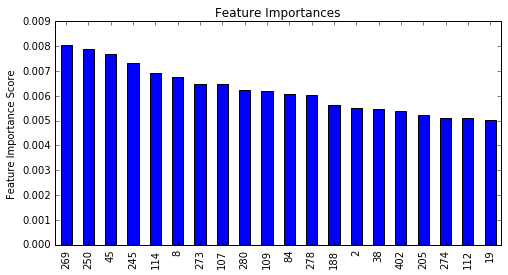

In [16]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,max_depth=5, min_samples_split=2, 
                                         min_samples_leaf=1, max_features=20,subsample=0.8, random_state=10)
modelfit1(gbm_tuned_1,all_feature_train, X_new_train,skf)


Model Report
Accuracy : 0.935
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      9325
       1000       1.00      0.55      0.71       741
       1500       1.00      0.53      0.69       465
       2000       1.00      0.56      0.72       354

avg / total       0.94      0.94      0.93     10885

CV Score : Mean - 0.8562244 | Std - 0.00150971 | Min - 0.8539945 | Max - 0.8585209


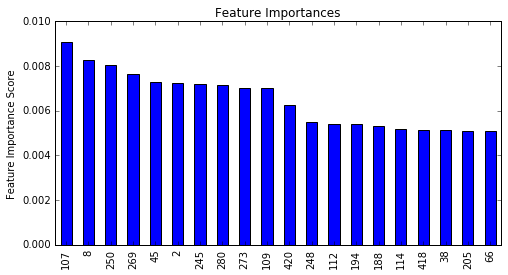

In [92]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,max_depth=5, min_samples_split=20, 
                                         min_samples_leaf=9, max_features=20,subsample=0.8, random_state=10)
modelfit1(gbm_tuned_2,all_feature_train, X_new_train,skf)


Model Report
Accuracy : 0.9317
             precision    recall  f1-score   support

          0       0.93      1.00      0.96      9325
       1000       1.00      0.53      0.69       741
       1500       1.00      0.49      0.66       465
       2000       1.00      0.55      0.71       354

avg / total       0.94      0.93      0.92     10885

CV Score : Mean - 0.8563164 | Std - 0.002100375 | Min - 0.8539274 | Max - 0.8594396


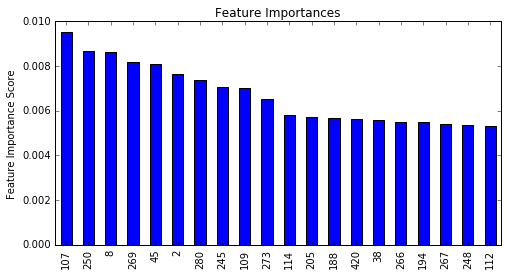

In [93]:
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000,max_depth=5, min_samples_split=20, 
                                         min_samples_leaf=20, max_features=20,subsample=0.8, random_state=10)
modelfit1(gbm_tuned_3,all_feature_train, X_new_train,skf)

In [86]:
#添加一个class_weight参数

def learn(x, y, flag,test_x):
    # set sample weight
    weight_0=1.2
    weight_1000=6.7
    weight_1500=7.4
    weight_2000=12.7

    weight_list = []
    for j in range(len(y)):
        if y[j] == 0:
            weight_list.append(weight_0)
        if y[j] == 1000:
            weight_list.append(weight_1000)
        if y[j] == 1500:
            weight_list.append(weight_1500)
        if y[j] == 2000:
            weight_list.append(weight_2000)
    if flag==1:
        clf = gbm_tuned_1.fit(x, y, weight_list)
        prediction_list = clf.predict(test_x)
    else:
        gbm1 = GradientBoostingClassifier(random_state=10)
        clf = gbm1.fit(x, y, weight_list)
        prediction_list = clf.predict(test_x)
    return prediction_list

In [87]:
result_test=learn(X_new_train,all_feature_train['money'],1,X_new_test)

In [26]:
result_test1=learn(X_new_train,all_feature_train['money'],0,X_new_test)

In [88]:
a={}
a['0']=0
a['1000']=0
a['1500']=0
a['2000']=0
for i in range(len(result_test)):
    if result_test[i]==0:
        a['0']+=1
    elif result_test[i]==1000:
        a['1000']+=1
    elif result_test[i]==1500:
        a['1500']+=1
    else:
        a['2000']+=1

In [89]:
a

{'0': 9145, '1000': 871, '1500': 480, '2000': 389}

In [12]:
test_result=pd.DataFrame(columns=['studentid','subsidy'])
test_result.studentid=ids
test_result.subsidy=test_predicted
test_result.subsidy=test_result.subsidy.apply(lambda x :int(x))

In [ ]:
#test_result.to_csv("output/submit2016.csv",index=False)